In [19]:
# pytesseract를 통한 이미지에서 텍스트 추출 
from PIL import Image
from pytesseract import *
import csv
import os 

In [95]:
# 이미지 원본을 사용하여 글자 인식 
f = open('labeling.csv','r')
rdr = csv.reader(f)
position = "./FloorPlan/"
for line in rdr:
    print("******",line[0],"*******")
    image = Image.open(position + line[0])
    Print = image_to_string(image,lang='kor',config='--psm 6 --oem 1')
    print(Print)

****** fp_000.jpg *******
- 0
1: | ~  |노
|. 바를릴리르르르르므르트트트트트리트

****** fp_001.jpg *******
교 냐
| ㅣ]     =   비  시 . |    ㅣ     |
9 벼              : 2거   | |
"       |                도이              ㅣ /       ㅣ 발코니 |
| 격       뜨 ㆍ                  |          | 、
주포 캐

****** fp_002.jpg *******
41] 0 0 4
스… 두     알파룸   12 의 |
1 1 쁘    _떼:배!  [」
| [|    008   [8 |9따
의 | 과 그
. 지1606666ㄷ202228리     -쁘그

****** fp_003.jpg *******
= ]4            _ [11117
_」|ㄷ기          110             에
1 태2         | 효               버드
그 는 ㅣ 으르           |)   9
5                          03                | /
6" 8       닐       삐
침실    |
으 ^ - 그 =          도토
00003

****** fp_004.jpg *******
때 =0정
오오
겨  .

   - 래 | ~
 나아 대는 두리트

****** fp_005.jpg *******
디그
 때 2

| 을 3134] |
0 ^
| |    겹 = 은 라테

****** fp_006.jpg *******
[비트티트이
^            도
/ ~ㄴ90007 개
<히[너            는
| 의                 때 에
[|         이 돈들
10 소조
나가              2
먼트

****** fp_007.jpg *******
나 시 23
[~ 나선   「   이 |볼서
로 [11
와   =
|.
태이

**

KeyboardInterrupt: 

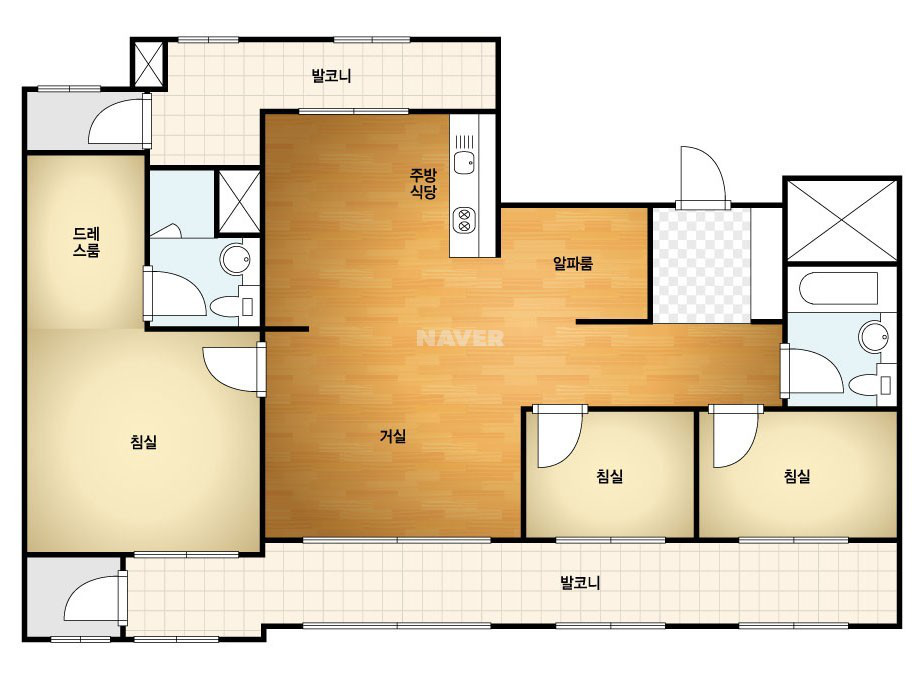

In [27]:
img = Image.open('./FloorPlan/fp_000.jpg')
img

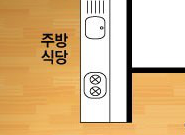

In [28]:
w,h = img.size
img = img.crop((2*w/5,h/5,3*w/5,2*h/5))
img

In [85]:
Print = image_to_string(img,lang='kor',config='--psm 9')
print(Print)

로



In [1]:
# Attempt 2 : 이미지 색생 변환 시킨뒤 인식시키기 
import cv2
import numpy as np

img = cv2.imread('./FloorPlan/fp_000.jpg')

canvas = np.zeros(shape=img.shape,dtype = np.uint8)
#canvas.fill(255)
#canvas[np.where((img == [0,0,0]).all(axis=2))] = [0,0,0]

cv2.imwrite('img000.png',canvas)



True

In [24]:
# rgb 값 000만 추출 시도 -> 도면 벽의 일부만 나옴 
img = cv2.imread('./FloorPlan/fp_000.jpg')
h,w,_ = img.shape

canvas = np.zeros(shape=img.shape,dtype=np.uint8)
canvas.fill(255)

for i in range(h) :
    for j in range(w):
        if all(img[i][j] == [0,0,0]): 
            canvas[i][j] = [0,0,0]

cv2.imwrite('img_test.png',canvas)

True

In [132]:
# rgb 값 000에서 40,40,40 사이의 값 추출 시도 -> 글자가 어느정도 들어옴 
img = cv2.imread('./FloorPlan/fp_000.jpg')
dst1 = cv2.inRange(img,(0,0,0),(130,130,130))
dst2 = cv2.dilate(dst1,kernel,)
cv2.imwrite('img_test2.png',dst1)


True

In [135]:
Print = image_to_string('img_test2.png',lang = 'kor',config='--psm 11 --oem 3')
print(Print)

매매 ==-====.

ㅠㅠ

발코니

려

10!

주방

식당

(호

|

0ㅡ

드레

스톰

쁘 .

@

알파룸

다00016 0

(@

|

티니

침실

거실

첨실

침실

0

00

발코니

- =

000 =

< |



In [97]:

for psm in range(14):
    Print = image_to_string('img_test2.png',lang='kor',config='--oem 0' + ' --psm ' + str(psm))
    print(Print)
    Print = image_to_string('img_test2.png',lang='kor',config='--oem 1' + ' --psm ' + str(psm))
    print(Print)
    Print = image_to_string('img_test2.png',lang='kor',config='--oem 2' + ' --psm ' + str(psm))
    print(Print)
    Print = image_to_string('img_test2.png',lang='kor',config='--oem 3' + ' --psm ' + str(psm))
    print(Print)

# i = 0
# l = 0
# option = '--psm '+ str(i) + '--oem ' + str(l)
# Print = image_to_string('img_test2.png',lang='kor',config= '--oem 1 --psm 6')
# print(Print)

TesseractError: (1, "Warning, detects only orientation with -l kor Error: Tesseract (legacy) engine requested, but components are not present in /opt/homebrew/share/tessdata/kor.traineddata!! Failed loading language 'kor' Tesseract couldn't load any languages! Could not initialize tesseract.")

In [118]:
Print = image_to_string('img_test2.png',lang='kor',config= '--psm 11 --oem 3')
print(Print)

발코니

00

주방

주방

식당

.@

제

드레

스를

프

알파를

00

녹 2

16

침실

거실

침실

침실

침

0000

발코니

=

=



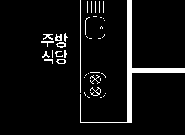

In [ ]:
img = Image.open('img_test2.png')
w,h = img.size
img = img.crop((2*w/5,h/5,3*w/5,2*h/5))
img

In [92]:
Print = image_to_string(img,lang='kor',config='--psm 5')
print(Print)

가 68
3000



In [137]:
# 모든 사진 글자와 벽면만 추출 후 글자 인식 시도 
f = open('labeling.csv','r')
rdr = csv.reader(f)
position = "./FloorPlan/"
for line in rdr:
    print("******",line[0],"*******")
    image = cv2.imread(position + line[0])
    dst = cv2.inRange(image,(0,0,0),(100,100,100))
    cv2.imwrite('./FloorPlan_WB/'+line[0],dst)
    #Print = image_to_string(dst,lang='kor',config='--psm 11 --oem 3')
    #print(Print)

****** fp_000.jpg *******
****** fp_001.jpg *******
****** fp_002.jpg *******
****** fp_003.jpg *******
****** fp_004.jpg *******
****** fp_005.jpg *******
****** fp_006.jpg *******
****** fp_007.jpg *******
****** fp_008.jpg *******
****** fp_009.jpg *******
****** fp_010.jpg *******
****** fp_011.jpg *******
****** fp_012.jpg *******
****** fp_013.jpg *******
****** fp_014.jpg *******
****** fp_015.jpg *******
****** fp_016.jpg *******
****** fp_017.jpg *******
****** fp_018.jpg *******
****** fp_019.jpg *******
****** fp_020.jpg *******
****** fp_021.jpg *******
****** fp_022.jpg *******
****** fp_023.jpg *******
****** fp_024.jpg *******
****** fp_025.jpg *******
****** fp_026.jpg *******
****** fp_027.jpg *******
****** fp_028.jpg *******
****** fp_029.jpg *******
****** fp_030.jpg *******
****** fp_031.jpg *******
****** fp_032.jpg *******
****** fp_033.jpg *******
****** fp_034.jpg *******
****** fp_035.jpg *******
****** fp_036.jpg *******
****** fp_037.jpg *******
****** fp_03

In [44]:
img_color = cv2.imread('./FloorPlan/fp_000.jpg')
h,w = img_color.shape[:2]

img_hsv = cv2.cvtColor(img_color,cv2.COLOR_BGR2HSV)
img_mask = cv2.inRange(img_hsv,(0,0,0),(3,3,3))
cv2.imwrite('img_001.png',img_mask)
cv2.imshow('img_mask',img_mask)